In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection

In [2]:
train_df = pd.read_csv('train.csv') #properties of the material
elements_df = pd.read_csv('unique_m.csv') #chemical formulas + critical temperature

In [3]:
train_df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [4]:
X = train_df.drop(columns=['critical_temp'])
y = train_df['critical_temp']

In [5]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state = 4)

## Train the data with different models

<AxesSubplot:>

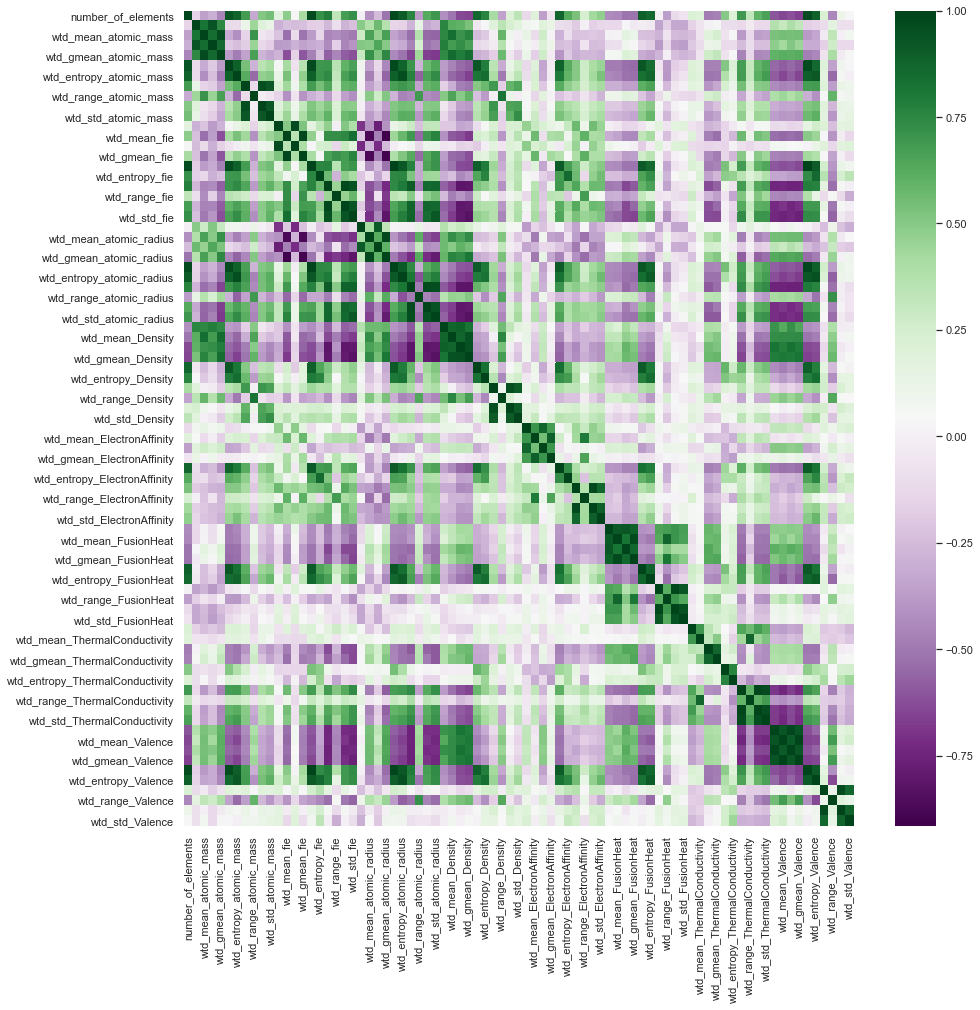

In [6]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(X_train.corr(), cmap='PRGn')

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

LinearRegression()

In [9]:
#COMPARISSON BETWEEN ACTUAL AND PREDDICTED
y_pred = linearmodel.predict(X_test)
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare

,Actual,Predicted
14671,11.30,12.019803
16698,8.00,5.537124
799,89.66,67.516751
12173,14.00,8.163185
1524,15.00,37.056265
...,...,...
3348,67.10,65.539359
18197,7.20,26.682129
10336,34.00,41.314435
19555,6.62,0.816915


### Lets train more models

In [10]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
models = [Perceptron, LogisticRegression, GaussianNB, RandomForestClassifier, AdaBoostClassifier, 
          MLPClassifier, GradientBoostingClassifier, SVC]

for model in models:
    clf = model()
    scores = model_selection.cross_val_score(clf, X_train, y_train, scoring='accuracy', n_jobs=-1)
    print(f"Accuracy for {model.__name__} is: {np.mean(scores):.2f}±{np.std(scores):.2f}")

In [17]:
from sklearn.metrics import accuracy_score

In [64]:
linearmodel.score(X_test,y_test)

0.7293038243931386

In [66]:
for model in models:
    trainmodel = model()
    trainmodel.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_compare
    print(f"Accuracy for {model} is: {model.score(X_test,y_test)}")

ValueError: Unknown label type: (array([2.100e-04, 3.250e-04, 4.000e-04, ..., 1.374e+02, 1.430e+02,
       1.850e+02]),)

In [69]:
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train,y_train)
#COMPARISSON BETWEEN ACTUAL AND PREDDICTED
y_pred = linearmodel.predict(X_test)
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare

ValueError: Unknown label type: 'continuous'